In [1]:
!pip install nltk

In [2]:
!pip install spacy

[nltk_data] Downloading package punkt to /home/akz-
[nltk_data]     portable/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/akz-
[nltk_data]     portable/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/akz-
[nltk_data]     portable/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 6.0 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Accuracy: 0.5652519893899204


[nltk_data] Downloading package punkt to /home/akz-
[nltk_data]     portable/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/akz-
[nltk_data]     portable/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/akz-
[nltk_data]     portable/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Accuracy: 0.5652519893899204

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.28      0.42       151
           1       0.67      0.44      0.53       202
           2       0.64      0.54      0.59       195
           3       0.58      0.62      0.60       183
           4       0.75      0.63      0.69       205
           5       0.78      0.53      0.64       215
           6       0.44      0.54      0.49       193
           7       0.80      0.57      0.66       196
           8       0.19      0.7

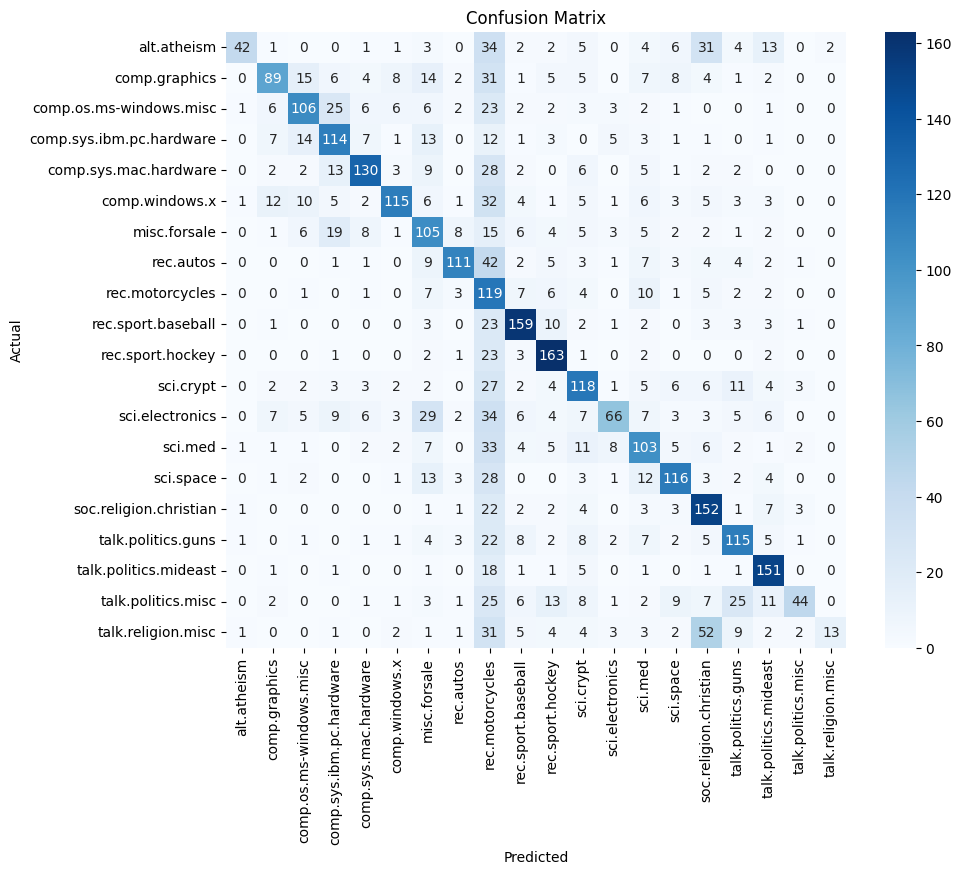

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Download SpaCy model for Named Entity Recognition (NER)
spacy.cli.download("en_core_web_sm")

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Tokenization, Stop Word Removal, Stemming, Lemmatization
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

X = [preprocess_text(text) for text in newsgroups.data]
y = newsgroups.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Named Entity Recognition (NER) using SpaCy
nlp = spacy.load("en_core_web_sm")

def ner(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return ' '.join(entities)

X_train_ner = [ner(text) for text in X_train]
X_test_ner = [ner(text) for text in X_test]

# Build a pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Train the pipeline
pipeline.fit(X_train_ner, y_train)

# Evaluate the pipeline
y_pred = pipeline.predict(X_test_ner)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy (SVM): 0.5445623342175067

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.56      0.37      0.45       151
           1       0.61      0.49      0.54       202
           2       0.62      0.53      0.57       195
           3       0.60      0.56      0.58       183
           4       0.72      0.59      0.65       205
           5       0.70      0.55      0.62       215
           6       0.45      0.52      0.48       193
           7       0.69      0.57      0.62       196
           8       0.48      0.49      0.49       168
           9       0.82      0.66      0.73       211
          10       0.83      0.73      0.78       198
          11       0.65      0.50      0.57       201
          12       0.33      0.42      0.37       202
          13       0.19      0.64      0.29       194
          14       0.72      0.60      0.65       189
          15       0.68      0.67      0.68       202
          16   

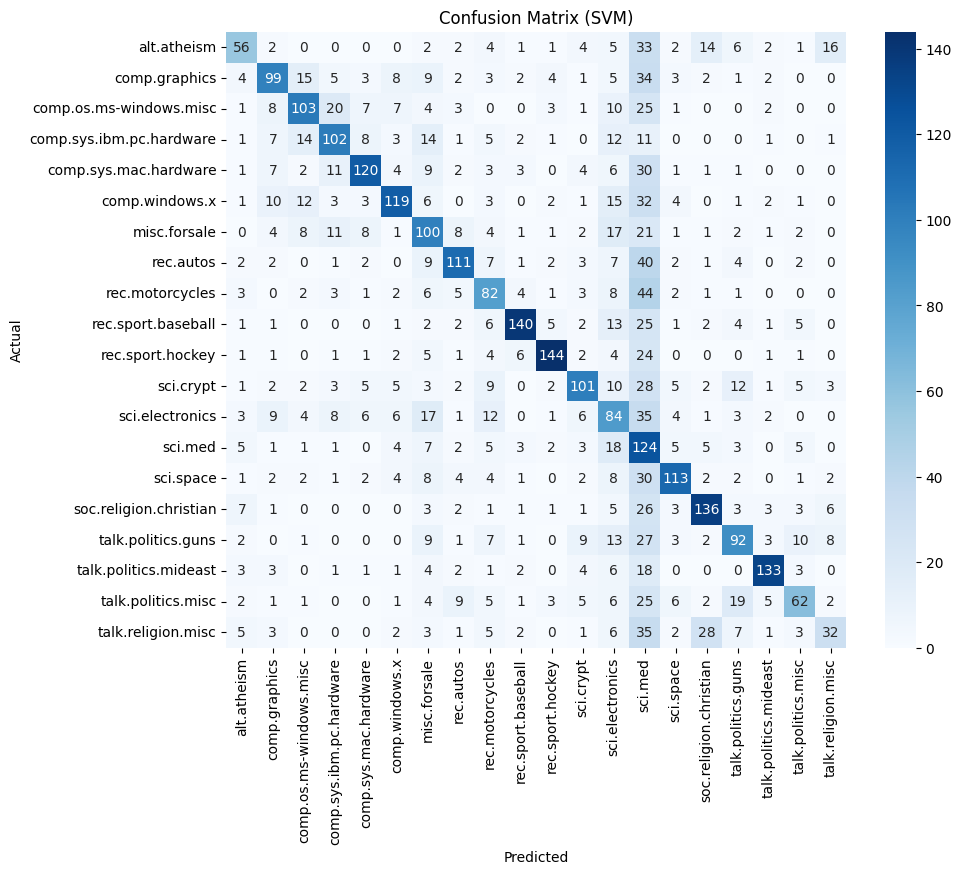

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Build a pipeline with TF-IDF and SVM classifier
pipeline_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC()),
])

# Define parameter grid for GridSearchCV
param_grid = {
    'clf__C': [0.1, 1, 10, 100],
    'clf__gamma': [0.001, 0.01, 0.1, 1],
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(pipeline_svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_ner, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_svm = best_model.predict(X_test_ner)

# Evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))

# Confusion matrix
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_svm, annot=True, fmt="d", cmap="Blues", xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()
